# QuTiP example: Trilinear Oscillator Coupling

J.R. Johansson and P.D. Nation

For more information about QuTiP see [http://qutip.org](http://qutip.org)

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from qutip import *
import time

In [3]:
#number of states for each mode
N0=8
N1=8
N2=8
K=1.0
#damping rates
gamma0=0.1
gamma1=0.1
gamma2=0.4
alpha=sqrt(3)#initial coherent state param for mode 0
epsilon=0.5j #sqeezing parameter
tfinal=4.0
dt=0.05
tlist=arange(0.0,tfinal+dt,dt)
taulist=K*tlist #non-dimensional times
ntraj=100#number of trajectories
#define operators
a0=tensor(destroy(N0),qeye(N1),qeye(N2))
a1=tensor(qeye(N0),destroy(N1),qeye(N2))
a2=tensor(qeye(N0),qeye(N1),destroy(N2))
#number operators for each mode
num0=a0.dag()*a0
num1=a1.dag()*a1
num2=a2.dag()*a2
#dissipative operators for zero-temp. baths
C0=sqrt(2.0*gamma0)*a0
C1=sqrt(2.0*gamma1)*a1
C2=sqrt(2.0*gamma2)*a2
#initial state: coherent mode 0 & vacuum for modes #1 & #2
vacuum=tensor(basis(N0,0),basis(N1,0),basis(N2,0))
D=(alpha*a0.dag()-conj(alpha)*a0).expm()
psi0=D*vacuum
#trilinear Hamiltonian
H=1j*K*(a0*a1.dag()*a2.dag()-a0.dag()*a1*a2)
#run Monte-Carlo
start_time=time.time()
#avg=mcsolve(H,psi0,taulist,ntraj,[C0,C1,C2],[num0,num1,num2])
output=mesolve(H,psi0,taulist,[C0,C1,C2],[num0,num1,num2])
avg=output.expect
finish_time=time.time()
print('time elapsed = ',finish_time-start_time)

time elapsed =  13.138076066970825


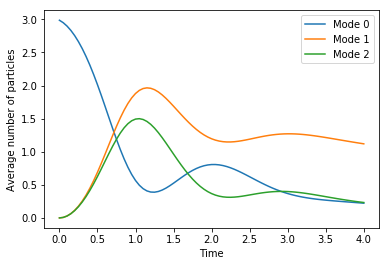

In [4]:
#plot expectation value for photon number in each mode
plot(taulist,avg[0],taulist,avg[1],taulist,avg[2])
xlabel("Time")
ylabel("Average number of particles")
legend(('Mode 0', 'Mode 1','Mode 2'));

## Deviation form thermal

In [5]:
from qutip import *
from pylab import *
import time
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
#number of states for each mode
N0=6
N1=6
N2=6

#define operators
a0=tensor(destroy(N0),qeye(N1),qeye(N2))
a1=tensor(qeye(N0),destroy(N1),qeye(N2))
a2=tensor(qeye(N0),qeye(N1),destroy(N2))

#number operators for each mode
num0=a0.dag()*a0
num1=a1.dag()*a1
num2=a2.dag()*a2

#initial state: coherent mode 0 & vacuum for modes #1 & #2
alpha=sqrt(2)#initial coherent state param for mode 0
initial=tensor(coherent(N0,alpha),basis(N1,0),basis(N2,0))
psi0=initial

#trilinear Hamiltonian
H=1.0j*(a0*a1.dag()*a2.dag()-a0.dag()*a1*a2)


#run Monte-Carlo
tlist=linspace(0,2.5,50)
output=mcsolve(H,psi0,tlist,[],[],1)

mode1=[ptrace(k,1) for k in output.states]
diags1=[real(k.diag()) for k in mode1]
num1=[expect(num1,k) for k in output.states]
thermal=[thermal_dm(N1,k).diag() for k in num1]

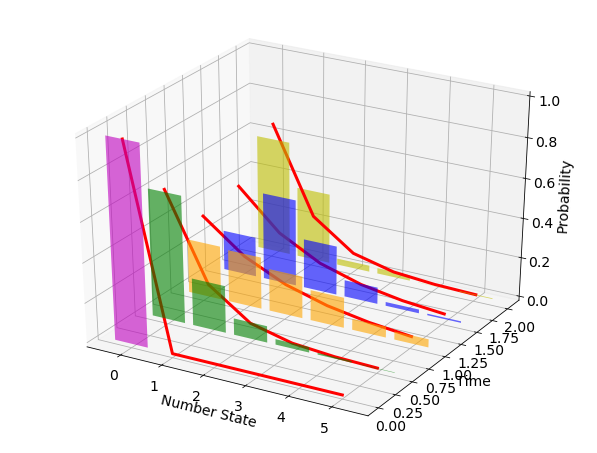

In [8]:
colors=['m', 'g','orange','b', 'y','pink']
x=range(N1)
params = {'axes.labelsize': 14,'font.size': 14,'legend.fontsize': 12,
          'xtick.labelsize': 14,'ytick.labelsize': 14}
rcParams.update(params)
fig = plt.figure(figsize=(8,6))
ax = Axes3D(fig)
for j in range(5):
    ax.bar(x, diags1[10*j], zs=tlist[10*j], zdir='y',color=colors[j],linewidth=1.0,
           alpha=0.6,align='center')
    ax.plot(x,thermal[10*j],zs=tlist[10*j],zdir='y',color='r',linewidth=3,alpha=1)
ax.set_zlabel(r'Probability')
ax.set_xlabel(r'Number State')
ax.set_ylabel(r'Time')
ax.set_zlim3d(0, 1);

## Software version:

In [7]:
from qutip.ipynbtools import version_table

version_table()

Software,Version
QuTiP,4.3.0.dev0+6e5b1d43
Numpy,1.13.1
SciPy,0.19.1
matplotlib,2.0.2
Cython,0.25.2
Number of CPUs,2
BLAS Info,INTEL MKL
IPython,6.1.0
Python,"3.6.2 |Anaconda custom (x86_64)| (default, Jul 20 2017, 13:14:59) [GCC 4.2.1 Compatible Apple LLVM 6.0 (clang-600.0.57)]"
OS,posix [darwin]
